<span style="color:#04c921; font-size:24px; font-weight:700"> Multiple Linear Regression</span>

In this practice, we will use the same data set as in simple linear regression practice. We will add more variables to models to see if we can have a better linear model. 

#### Read the data

Load the framingham dataset in directory '/datasets/framingham/'. The following few lines are the same as in simple linear regression practice; we are creating the same data here. 

In [1]:
framingham_data <- read.csv("/dsa/data/all_datasets/framingham/framingham.csv")

In [2]:
framingham_data["pulseP"] <- framingham_data$sysBP - framingham_data$diaBP

framingham_data_male   <- subset(framingham_data, male==1 & age > 18 & BPMeds == 0, select=c(2,11:14,17))
framingham_data_female <- subset(framingham_data, male==0 & age > 18 & BPMeds == 0, select=c(2,11:14,17))

In [3]:
head(framingham_data_male)

,age,sysBP,diaBP,BMI,heartRate,pulseP
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,39,106.0,70,26.97,80,36.0
3,48,127.5,80,25.34,75,47.5
9,52,141.5,89,26.36,76,52.5
10,43,162.0,107,23.61,93,55.0
13,46,142.0,94,26.31,98,48.0
17,48,138.0,90,22.37,64,48.0


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> Fit a multiple regression model to predict pulseP using age and BMI. 

In [4]:
# Fill the partially complete code and execute it..
pp_female1 <- lm(pulseP ~ age + BMI, data = framingham_data_female)
summary(pp_female1)

# add heartRate to pp_male1 model and create new model named pp_male2. 
pp_female2 <- lm(pulseP ~ age + BMI + heartRate, data = framingham_data_female)
summary(pp_female2)


Call:
lm(formula = pulseP ~ age + BMI, data = framingham_data_female)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.179  -8.623  -1.283   6.603  91.553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.37378    2.06408  -1.150     0.25    
age          0.78774    0.03311  23.789  < 2e-16 ***
BMI          0.52565    0.06374   8.246 2.73e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.1 on 2277 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.2477,	Adjusted R-squared:  0.2471 
F-statistic: 374.9 on 2 and 2277 DF,  p-value: < 2.2e-16



Call:
lm(formula = pulseP ~ age + BMI + heartRate, data = framingham_data_female)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.227  -8.704  -1.157   6.607  90.056 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.20639    2.63871  -4.247 2.25e-05 ***
age           0.79015    0.03292  24.003  < 2e-16 ***
BMI           0.50019    0.06354   7.872 5.37e-15 ***
heartRate     0.12134    0.02279   5.323 1.12e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.03 on 2276 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.257,	Adjusted R-squared:  0.256 
F-statistic: 262.4 on 3 and 2276 DF,  p-value: < 2.2e-16


As we can see, the $R^2$ slightly increases with adding a new variable to the model. Let's do the same for males. 

In [5]:
pp_male1 <- lm(pulseP ~ age + BMI, data = framingham_data_male)
summary(pp_male1)

# add heartRate to pp_female model and create new model named pp_female2. 
pp_male2 <- lm(pulseP ~ age + BMI + heartRate, data = framingham_data_male)
summary(pp_male2)


Call:
lm(formula = pulseP ~ age + BMI, data = framingham_data_male)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.407  -7.906  -1.154   5.576  70.409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.41515    2.68002   7.244 6.47e-13 ***
age          0.44985    0.03240  13.883  < 2e-16 ***
BMI          0.22087    0.08097   2.728  0.00644 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.6 on 1762 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.1016,	Adjusted R-squared:  0.1006 
F-statistic: 99.68 on 2 and 1762 DF,  p-value: < 2.2e-16



Call:
lm(formula = pulseP ~ age + BMI + heartRate, data = framingham_data_male)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.297  -7.790  -1.062   5.604  71.141 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.28534    3.08322   3.336 0.000868 ***
age          0.45157    0.03201  14.106  < 2e-16 ***
BMI          0.16487    0.08032   2.053 0.040245 *  
heartRate    0.14137    0.02348   6.020 2.12e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.44 on 1760 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.1182,	Adjusted R-squared:  0.1167 
F-statistic: 78.62 on 3 and 1760 DF,  p-value: < 2.2e-16


For males, we can not model the pulse pressure that well, $R^2$ does not get any better.

#### House sales data
Let's look at another data set: house sales in King county.

In [6]:
housing_data <- read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv",header=TRUE)
str(housing_data)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> Fit a linear regression model to predict the house sale price using sqft_living.  

In [7]:
# Fill in the partially complete code and execute the code..

houseprice_reg <- lm(price ~ sqft_living, data = housing_data)
summary(houseprice_reg)


Call:
lm(formula = price ~ sqft_living, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476062  -147486   -24043   106182  4362067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43580.743   4402.690  -9.899   <2e-16 ***
sqft_living    280.624      1.936 144.920   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261500 on 21611 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21611 DF,  p-value: < 2.2e-16


As we can see, sqft_living is a good predictor for the price. Let's see if we can improve this model with additional variables.

In [9]:
# add the second variable: bedrooms
houseprice_reg2 <- lm(price ~ sqft_living + bedrooms, data = housing_data)
summary(houseprice_reg2)



Call:
lm(formula = price ~ sqft_living + bedrooms, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1650867  -143866   -23143   102344  4179850 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  79469.359   6604.764   12.03   <2e-16 ***
sqft_living    313.949      2.337  134.31   <2e-16 ***
bedrooms    -57066.759   2308.223  -24.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 257800 on 21610 degrees of freedom
Multiple R-squared:  0.5068,	Adjusted R-squared:  0.5068 
F-statistic: 1.11e+04 on 2 and 21610 DF,  p-value: < 2.2e-16


In [10]:
# add the third variable: sqft_lot

houseprice_reg3 <- lm(price ~ sqft_living + bedrooms + sqft_lot, data = housing_data)
summary(houseprice_reg3)


Call:
lm(formula = price ~ sqft_living + bedrooms + sqft_lot, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1578538  -143639   -22850   102992  4149420 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.278e+04  6.604e+03  12.536   <2e-16 ***
sqft_living  3.179e+02  2.376e+00 133.801   <2e-16 ***
bedrooms    -5.880e+04  2.312e+03 -25.428   <2e-16 ***
sqft_lot    -3.818e-01  4.307e-02  -8.866   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 257400 on 21609 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.5085 
F-statistic:  7455 on 3 and 21609 DF,  p-value: < 2.2e-16


In [11]:
# add the fourth variable: floors

houseprice_reg4 <- lm(price ~ sqft_living + bedrooms + sqft_lot + floors, data = housing_data)
summary(houseprice_reg4)


Call:
lm(formula = price ~ sqft_living + bedrooms + sqft_lot + floors, 
    data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1577821  -143544   -22590   102907  4150548 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.175e+04  7.674e+03  10.653   <2e-16 ***
sqft_living  3.177e+02  2.510e+00 126.577   <2e-16 ***
bedrooms    -5.877e+04  2.315e+03 -25.391   <2e-16 ***
sqft_lot    -3.810e-01  4.319e-02  -8.820   <2e-16 ***
floors       9.216e+02  3.479e+03   0.265    0.791    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 257400 on 21608 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.5085 
F-statistic:  5591 on 4 and 21608 DF,  p-value: < 2.2e-16


In [12]:
# add the fifth variable: bathrooms

houseprice_reg5 <- lm(price ~ sqft_living + bedrooms + sqft_lot + floors + bathrooms, data = housing_data)
summary(houseprice_reg5)


Call:
lm(formula = price ~ sqft_living + bedrooms + sqft_lot + floors + 
    bathrooms, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1573404  -143855   -22380   102493  4148365 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.066e+04  7.696e+03  10.481   <2e-16 ***
sqft_living  3.143e+02  3.132e+00 100.355   <2e-16 ***
bedrooms    -5.953e+04  2.351e+03 -25.319   <2e-16 ***
sqft_lot    -3.788e-01  4.320e-02  -8.769   <2e-16 ***
floors      -1.758e+03  3.776e+03  -0.466   0.6415    
bathrooms    6.958e+03  3.809e+03   1.827   0.0678 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 257400 on 21607 degrees of freedom
Multiple R-squared:  0.5087,	Adjusted R-squared:  0.5086 
F-statistic:  4474 on 5 and 21607 DF,  p-value: < 2.2e-16


Adding number of bedrooms as another variable helped to improve the model, but other additional variables 
(lot's square footage, number of floors, number of bathrooms) did not improve the model at all. Let's try 
 couple of variables that should make a real difference: waterfront and view.

In [13]:
# add waterfront and view along with sqft_living and bedrooms
houseprice_reg6 <- lm(price ~ sqft_living + bedrooms + waterfront + view, data = housing_data)
summary(houseprice_reg6)


Call:
lm(formula = price ~ sqft_living + bedrooms + waterfront + view, 
    data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1621141  -134217   -18156   102136  4250015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77980.705   6249.236   12.48   <2e-16 ***
sqft_living    283.846      2.312  122.75   <2e-16 ***
bedrooms    -44339.059   2197.772  -20.18   <2e-16 ***
waterfront  556063.278  20957.060   26.53   <2e-16 ***
view         72563.936   2460.963   29.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 243800 on 21608 degrees of freedom
Multiple R-squared:  0.559,	Adjusted R-squared:  0.5589 
F-statistic:  6846 on 4 and 21608 DF,  p-value: < 2.2e-16


$R^2$ jumped to **0.56**; this is a better model for price of the house. The other variables (lat, long, zip code, etc.) 
    are not really expected to make a difference because we don't expect a **linear** relationship between a house's 
    price and its zip code unless zip codes are demographically meaningful. Let's try and see.

In [14]:
# add zipcode to houseprice_reg6 along with sqft_living + bedrooms + waterfront + view
houseprice_reg7 <- lm(price ~ sqft_living + bedrooms + waterfront + view + zipcode, data = housing_data)
summary(houseprice_reg)


Call:
lm(formula = price ~ sqft_living, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476062  -147486   -24043   106182  4362067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43580.743   4402.690  -9.899   <2e-16 ***
sqft_living    280.624      1.936 144.920   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261500 on 21611 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21611 DF,  p-value: < 2.2e-16


As we expected, zipcode does not make much of a difference. How about latitude or longitude ? Depending on the geographic location of the King county, it might make a difference. Let's see.

In [15]:
# Test both Lat and Long

# add lat with sqft_living + bedrooms + waterfront + view

houseprice_reg8 <- lm(price ~ sqft_living + bedrooms + waterfront + view + lat, data = housing_data)
summary(houseprice_reg8)

# add long with sqft_living + bedrooms + waterfront + view

houseprice_reg9 <- lm(price ~ sqft_living + bedrooms + waterfront + view + long, data = housing_data)
summary(houseprice_reg9)



Call:
lm(formula = price ~ sqft_living + bedrooms + waterfront + view + 
    lat, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1610741  -111403   -13816    79353  4280057 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.409e+07  5.215e+05  -65.38   <2e-16 ***
sqft_living  2.738e+02  2.118e+00  129.32   <2e-16 ***
bedrooms    -3.773e+04  2.010e+03  -18.77   <2e-16 ***
waterfront   5.810e+05  1.915e+04   30.34   <2e-16 ***
view         7.341e+04  2.248e+03   32.66   <2e-16 ***
lat          7.185e+05  1.096e+04   65.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 222700 on 21607 degrees of freedom
Multiple R-squared:  0.6321,	Adjusted R-squared:  0.632 
F-statistic:  7424 on 5 and 21607 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + bedrooms + waterfront + view + 
    long, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1681578  -128313   -11827   106163  4089392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.057e+07  1.478e+06  -27.46   <2e-16 ***
sqft_living  2.995e+02  2.343e+00  127.83   <2e-16 ***
bedrooms    -4.609e+04  2.161e+03  -21.32   <2e-16 ***
waterfront   5.506e+05  2.060e+04   26.73   <2e-16 ***
view         6.286e+04  2.445e+03   25.72   <2e-16 ***
long        -3.324e+05  1.208e+04  -27.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 239700 on 21607 degrees of freedom
Multiple R-squared:  0.5739,	Adjusted R-squared:  0.5738 
F-statistic:  5820 on 5 and 21607 DF,  p-value: < 2.2e-16


Latitude made a big difference! $R^2$ is **0.63**.
Let's find out why. Take a look at [King county map](https://www.google.com/maps/place/King+County,+WA/@47.4319563,-122.3574591,9z/data=!3m1!4b1!4m5!3m4!1s0x54905c8c832d7837:0xe280ab6b8b64e03e!8m2!3d47.5480339!4d-121.9836029).
Now it should be clear why an east-to-west change in location has an effect on the house price.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> What is your observations about the residuals of houseprice_reg  vs houseprice_reg8? Create all relevant plots (Q-Q plot, residuals vs fitted, etc.) and comment on the models and residuals. 

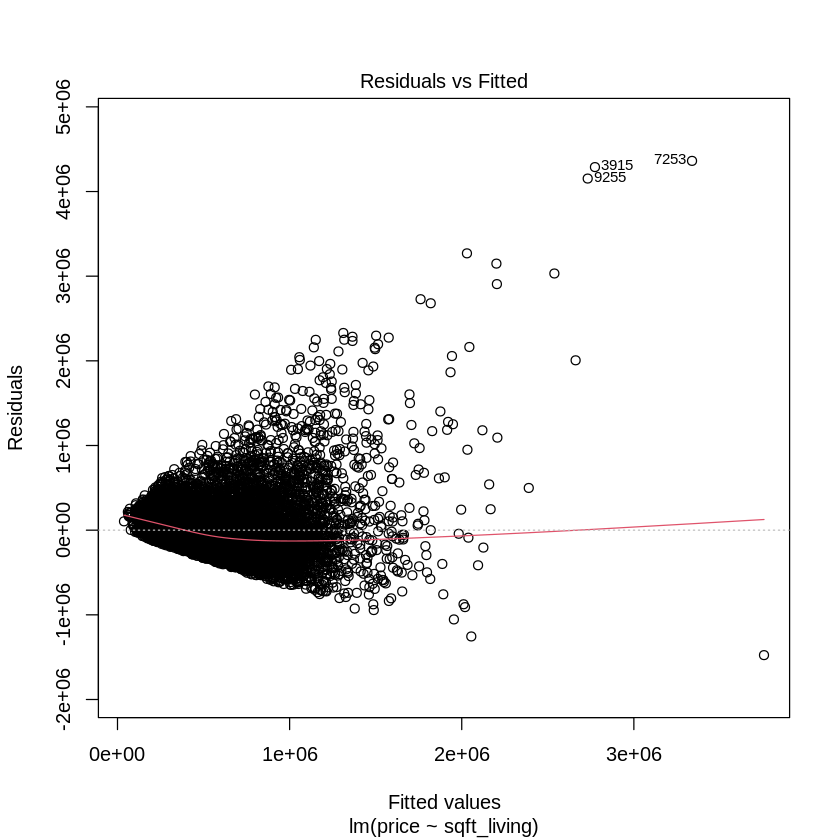

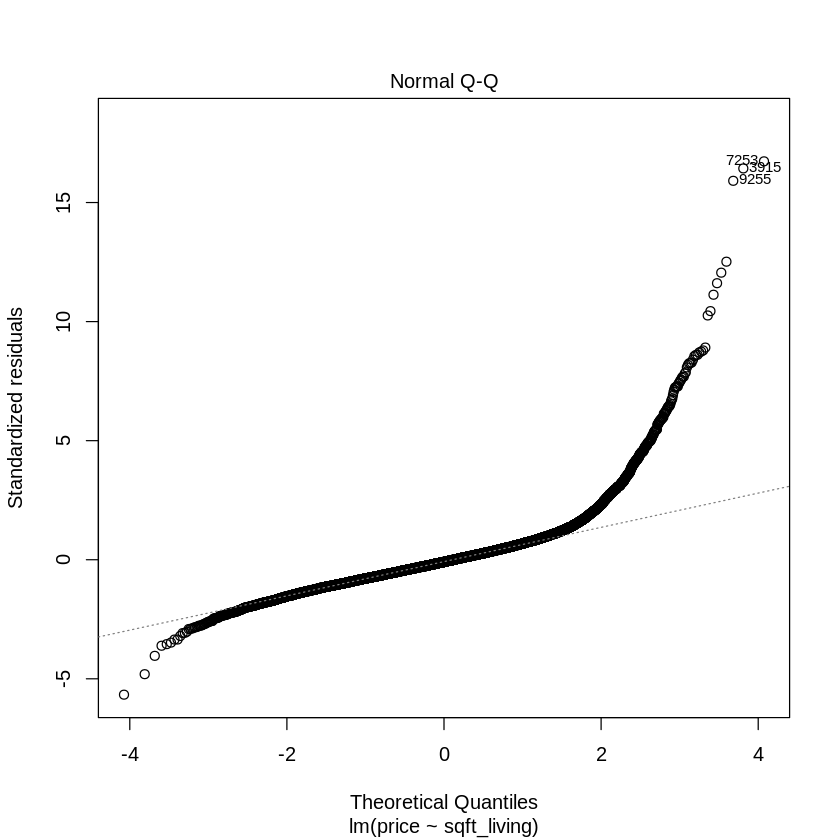

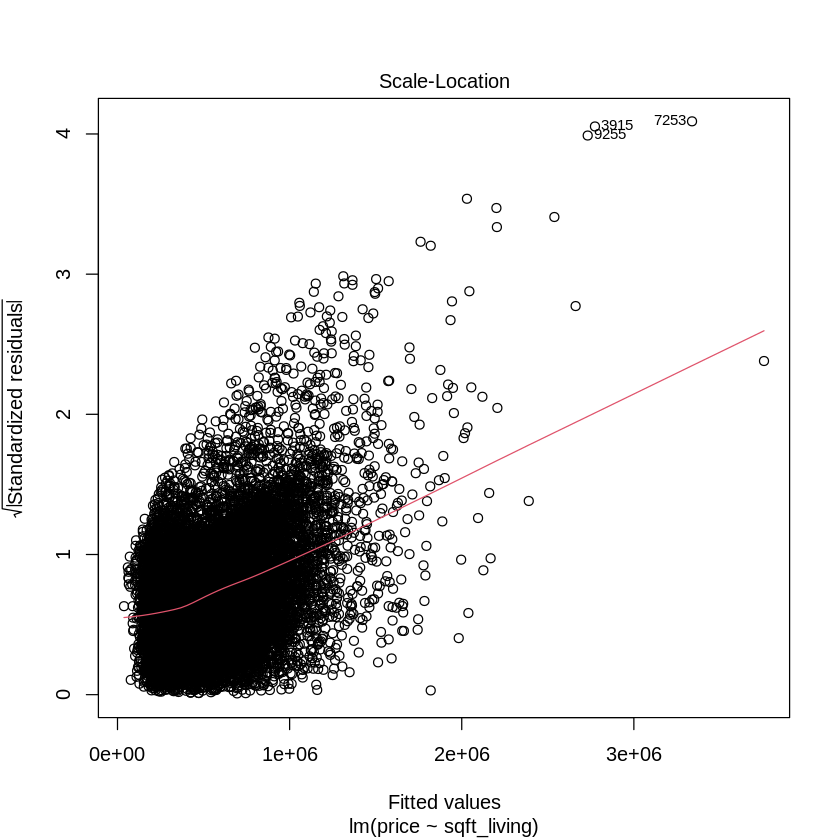

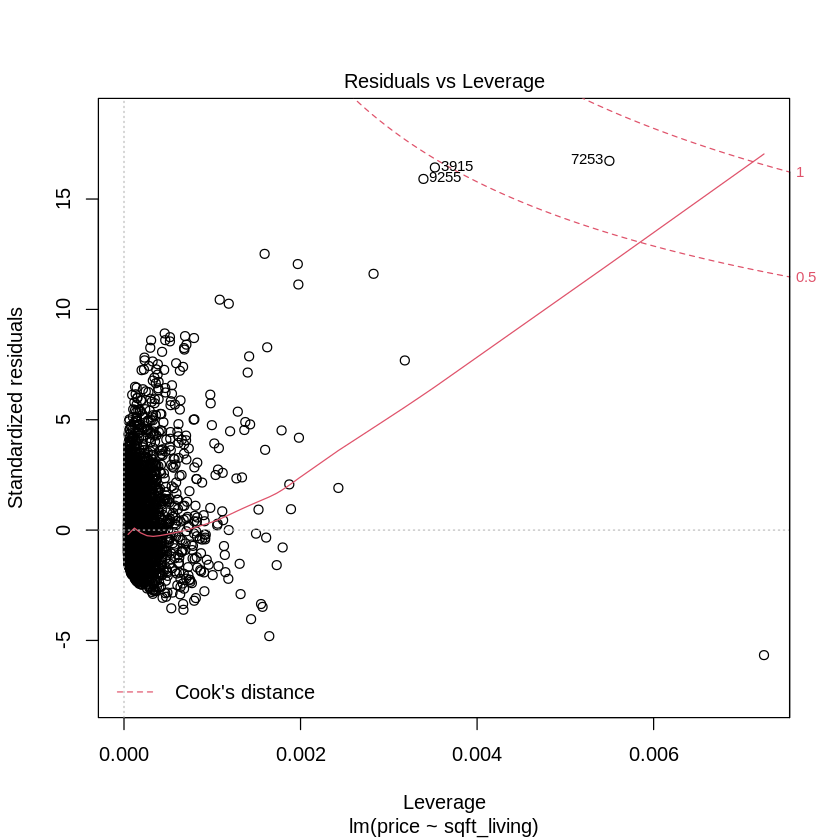

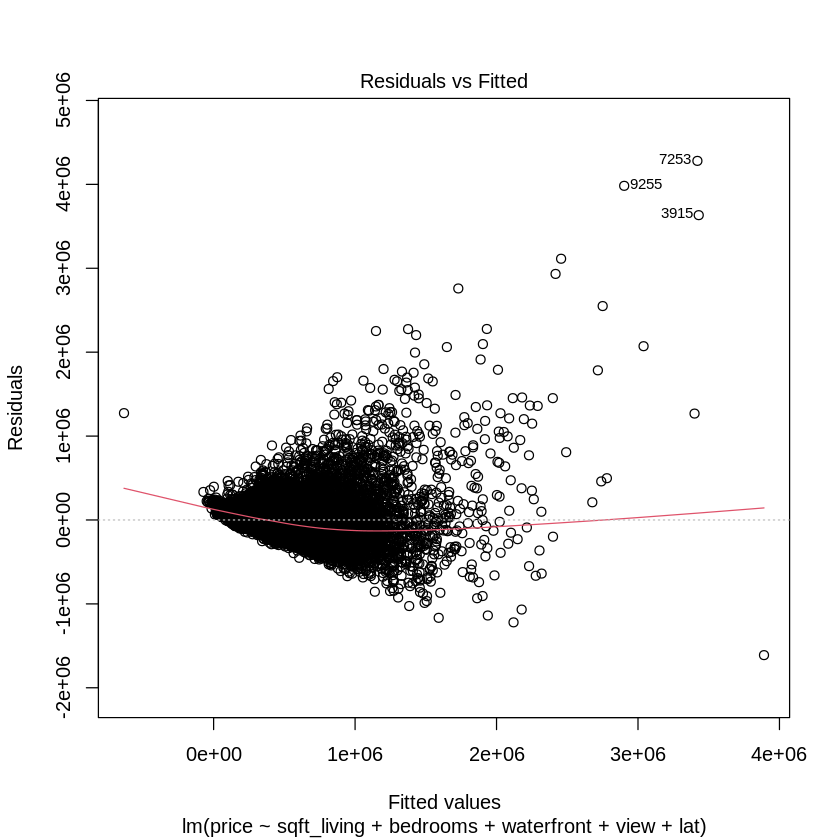

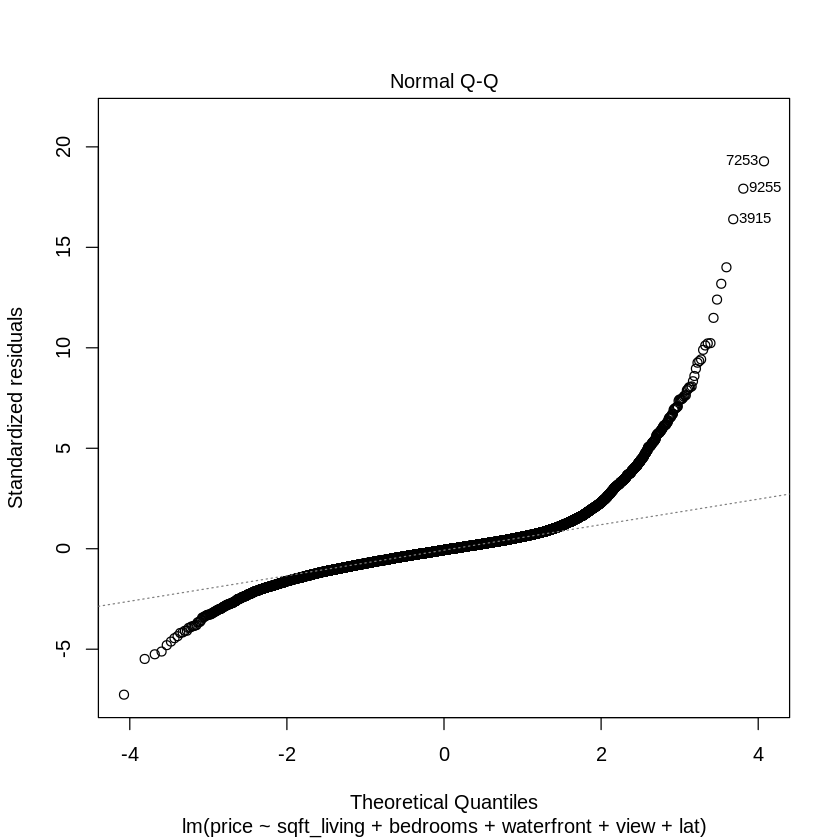

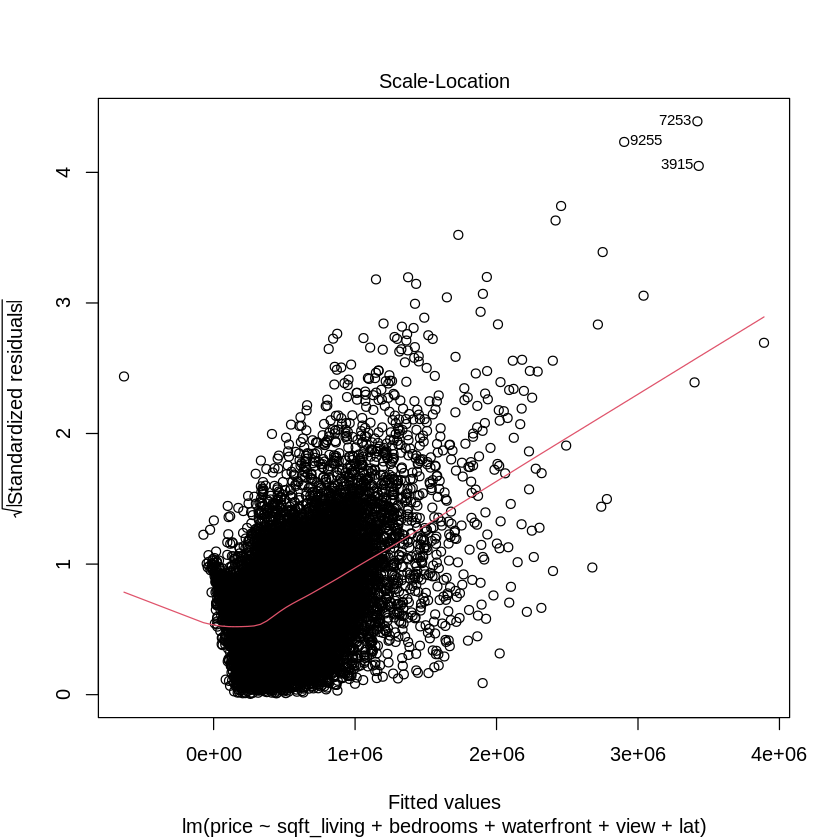

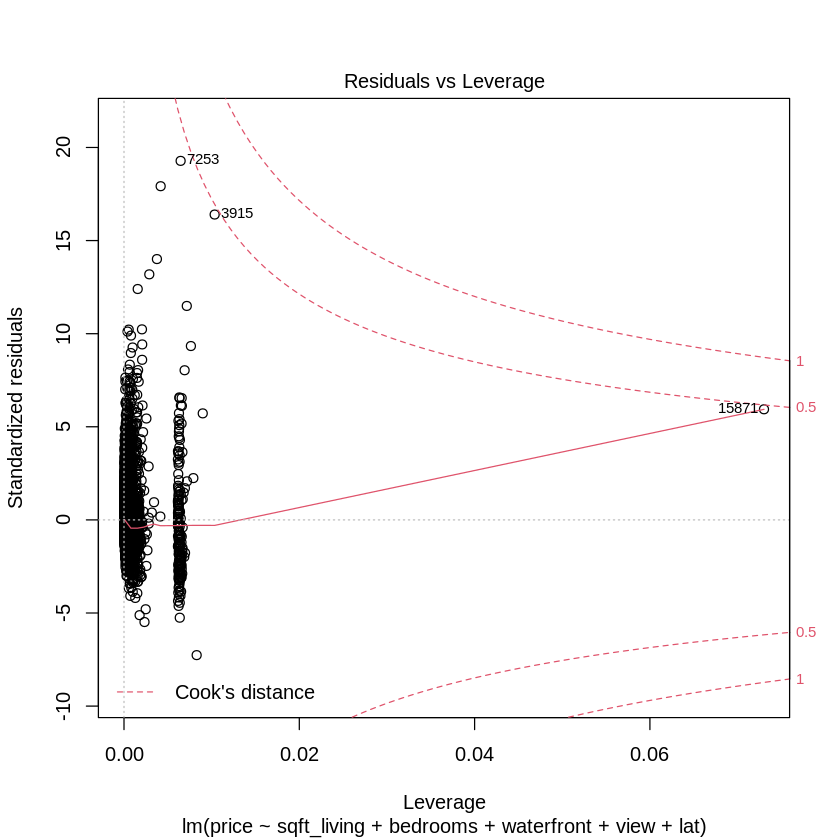

In [17]:
# code for activity 3 
plot(houseprice_reg)
plot(houseprice_reg8)

# Save your notebook!